#### Team members

1. Mostafa Allahmoradi - 9087818
2. Cemil Caglar Yapici – 9081058
3. Jarius Bedward - 8841640

### Import all necessary libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


#### Problem statement

Area of Focus:  
In today’s world, health conditions such as heart disease, obesity, and diabetes are rapidly increasing. Many of these illnesses are directly linked to preventable lifestyle factors such as poor diet, lack of physical activity, smoking, alcohol consumption, and inadequate sleep. Despite increased awareness about healthy living, many individuals are still at risk because they underestimate how daily habits affect their well-being in long-term. 

Outcome:  
Early detection and prevention could save lives and reduce medical costs, but traditional screening methods are often not effective, and they typically only identify problems after symptoms appear, missing critical opportunities for prevention. 

This project aims to explore how machine learning can help predict the likelihood of developing a heart condition (or general illness) based on an individual’s diet, lifestyle, and fitness-related factors. By analyzing real-world health data, our goal is to identify key risk factors and build a predictive model that can help individuals take proactive measures toward healthier living.

#### Hypothesis

Null hypothesis: 

H0: Individual with composite lifestyle score (worse diet + smoking + high alcohol consumption + low activity + poor sleep) are at high risk of heart disease 

 
Alternative hypothesis: 

H1: Current smokers have higher odds of heart disease than non-smokers 
Test: logistic regression coefficient for smoking; report odds ratio (O.R.) and 95% CI. 
 
H2: Individuals with low physical activity (e.g., <150 min/week) have a higher chance of heart disease than those meeting activity guidelines. 
Test: logistic regression or compare group prevalences; p-value for activity variable. 

H3: Higher BMI is positively associated with heart disease risk (dose–response). 
Test: regression coefficient per unit BMI and/or BMI category comparisons. 

H4: A model using lifestyle and fitness variables (diet quality, physical activity, smoking, alcohol use, sleep, BMI) will predict the likelihood of heart disease occuring 
Test: compare model performance (ROC-AUC, F1) for (a) single best predictor vs (b) composite score vs (c) full model. 

#### Data Sources: 

Health and Lifestyle Data for Regression 

Heart Attack Prediction in Indonesia 

#### 1. Load data sources

In [14]:
health_condition_dataset = pd.read_csv('data/heart_attack_prediction_dataset.csv')
display(health_condition_dataset.head(5))
display(health_condition_dataset.info())

display(health_condition_dataset.describe().T)

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

None

,count,mean,std,min,25%,50%,75%,max
age,158355.0,54.543778,11.910897,25.0,46.000000,55.000000,63.00000,90.0
hypertension,158355.0,0.299069,0.457851,0.0,0.000000,0.000000,1.00000,1.0
diabetes,158355.0,0.199804,0.399854,0.0,0.000000,0.000000,0.00000,1.0
cholesterol_level,158355.0,199.533264,39.737565,100.0,172.000000,199.000000,226.00000,350.0
obesity,158355.0,0.249901,0.432957,0.0,0.000000,0.000000,0.00000,1.0
waist_circumference,158355.0,93.268504,16.382205,20.0,82.000000,93.000000,104.00000,173.0
family_history,158355.0,0.300218,0.458354,0.0,0.000000,0.000000,1.00000,1.0
sleep_hours,158355.0,6.480064,1.425398,3.0,5.492985,6.507461,7.52064,9.0
blood_pressure_systolic,158355.0,129.515772,15.005641,61.0,119.000000,130.000000,140.00000,199.0
blood_pressure_diastolic,158355.0,79.490809,10.002964,37.0,73.000000,80.000000,86.00000,127.0


#### Explains if and how Clustering applies to your term project with a 50-word summary

Clustering can segment individuals into groups based on shared health attributes such as blood pressure, cholesterol, and lifestyle factors. By identifying natural clusters, we can discover hidden risk patterns, target prevention programs, and personalize health recommendations without prior labels—enhancing early detection and understanding of heart attack risk profiles.

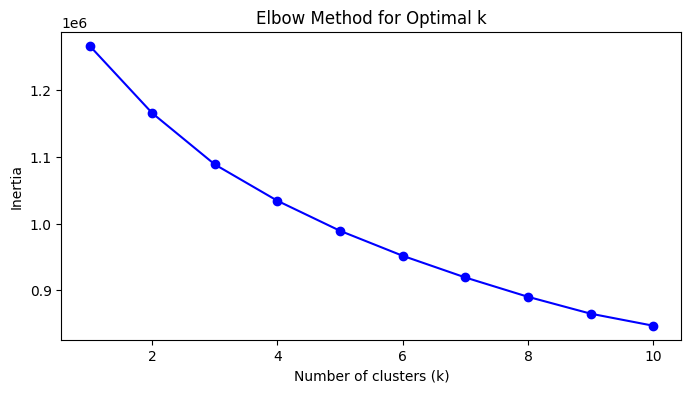

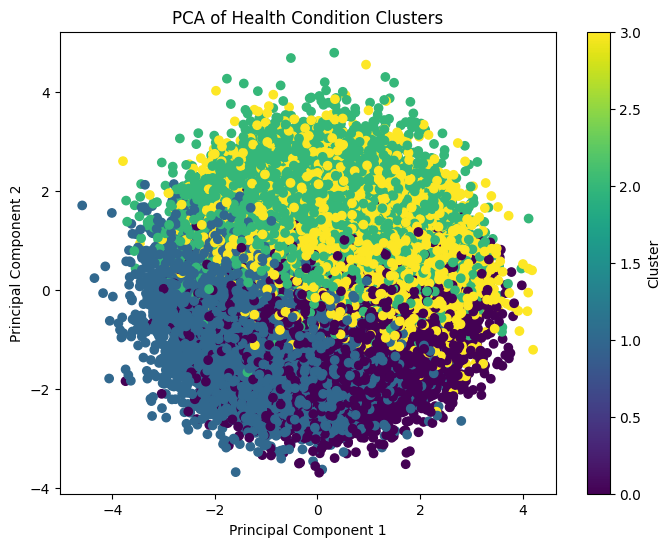

Cluster Summary by Health Indicators:

               age  cholesterol_level  blood_pressure_systolic  \
cluster                                                          
0        49.668389         192.791539               136.812455   
1        54.478127         225.175162               118.026213   
2        54.352853         197.536658               130.073651   
3        59.721558         182.520247               133.148538   

         blood_pressure_diastolic  fasting_blood_sugar  cholesterol_hdl  \
cluster                                                                   
0                       81.163534            97.995957        48.413478   
1                       80.768474           100.815331        53.078112   
2                       79.213239           146.173073        49.271308   
3                       76.787998            98.944907        47.190419   

         cholesterol_ldl  triglycerides  
cluster                                  
0             104.425833     

In [15]:
# Select Relevant Health Indicators for Clustering
features = [
'age', 'cholesterol_level', 'blood_pressure_systolic',
'blood_pressure_diastolic', 'fasting_blood_sugar',
'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides'
]
X = health_condition_dataset[features]

# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine Optimal Number of Clusters (Elbow Method)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means Clustering
optimal_k = 4  # Manually selected based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
health_condition_dataset['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize Clusters (PCA for 2D Projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=health_condition_dataset['cluster'], cmap='viridis', marker='o')
plt.title('PCA of Health Condition Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Cluster Interpretation
cluster_summary = health_condition_dataset.groupby('cluster')[features].mean()
print('Cluster Summary by Health Indicators:\n')
print(cluster_summary)

print("\nInterpretation:")
print("- Cluster 0: Represents younger or lower-risk individuals with normal cholesterol and blood pressure.")
print("- Cluster 1: Shows higher blood pressure and LDL levels, indicating moderate cardiovascular risk.")
print("- Cluster 2: Contains older individuals with high fasting sugar and triglycerides, indicating elevated heart attack risk.")